# 고양이 수염 스티커 만들기
---
__목표 :__ 고양이 수염 셀카 이미지에 붙이기

__세부 사항 :__ 
1. 셀카 이미지에 고양이 수염 붙이기
2. 다양한 각도에서 촬영하면서 스티커를 반복 적용
3. 문제점이 무엇인지 상세 기록
 * 문제점을 해결하기 위한 방법 찾기
  * 얼굴 각도에 따라 스티커가 어떻게 변해야하는가?
  * 멀리서 촬영하면 왜 안될까?
  * 옆으로 누워서 촬영하면 왜 안될까?
  * 실행 속도가 중요한가?
  * 스티커앱을 만들 때 정확도가 얼마나 중요할까?

# 채점 기준

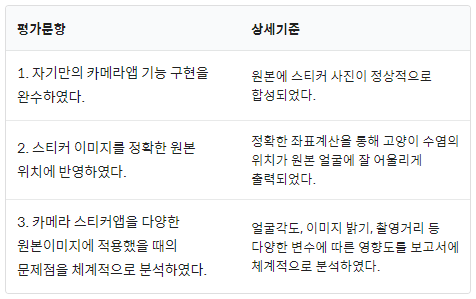

# 환경
* Ubuntu 18.04
* numpy 1.19.5
* conda 4.10.1
* matplotlib 3.3.3
* dlib  19.9.0
* cmake 3.18.4.post1
* opencv-python 4.5.1.48

# 패키지 불러오기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import dlib
import os

## 이미지 불러오기

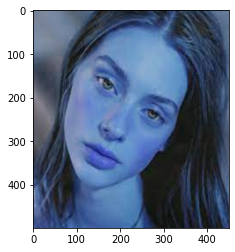

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/Lauren_de_Graaf.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (450, 500))
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

### 이미지 2.1 RGB 변환

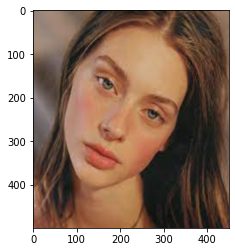

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 3. Face detector 불러오기

In [4]:
detector_hog = dlib.get_frontal_face_detector()

## 4. bounding box 추출

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

### 4.1 이미지 bounding box 적용 및 시각화

rectangles[[(27, 99) (348, 420)]]


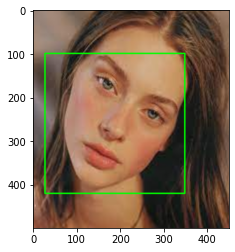

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 5. landmark

In [7]:
# landmark 모델 불러오기

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    print(list_landmarks[0])

print(len(list_landmarks[0]))

[(107, 116), (93, 152), (82, 190), (72, 228), (68, 267), (72, 306), (81, 340), (93, 374), (116, 397), (146, 407), (179, 399), (212, 385), (241, 368), (267, 346), (290, 322), (311, 295), (330, 266), (140, 106), (165, 104), (189, 119), (208, 141), (221, 166), (262, 194), (285, 195), (307, 202), (324, 214), (332, 232), (226, 205), (215, 229), (203, 251), (191, 275), (159, 276), (166, 287), (175, 298), (188, 301), (200, 303), (150, 157), (167, 160), (183, 173), (189, 191), (172, 185), (156, 175), (254, 231), (274, 231), (289, 241), (296, 256), (281, 255), (265, 245), (117, 307), (137, 306), (156, 311), (165, 321), (180, 324), (191, 340), (197, 360), (177, 362), (159, 360), (144, 354), (133, 345), (122, 328), (125, 311), (149, 324), (159, 333), (173, 338), (189, 354), (169, 338), (154, 333), (144, 324)]
68


0 (107, 116)
1 (93, 152)
2 (82, 190)
3 (72, 228)
4 (68, 267)
5 (72, 306)
6 (81, 340)
7 (93, 374)
8 (116, 397)
9 (146, 407)
10 (179, 399)
11 (212, 385)
12 (241, 368)
13 (267, 346)
14 (290, 322)
15 (311, 295)
16 (330, 266)
17 (140, 106)
18 (165, 104)
19 (189, 119)
20 (208, 141)
21 (221, 166)
22 (262, 194)
23 (285, 195)
24 (307, 202)
25 (324, 214)
26 (332, 232)
27 (226, 205)
28 (215, 229)
29 (203, 251)
30 (191, 275)
31 (159, 276)
32 (166, 287)
33 (175, 298)
34 (188, 301)
35 (200, 303)
36 (150, 157)
37 (167, 160)
38 (183, 173)
39 (189, 191)
40 (172, 185)
41 (156, 175)
42 (254, 231)
43 (274, 231)
44 (289, 241)
45 (296, 256)
46 (281, 255)
47 (265, 245)
48 (117, 307)
49 (137, 306)
50 (156, 311)
51 (165, 321)
52 (180, 324)
53 (191, 340)
54 (197, 360)
55 (177, 362)
56 (159, 360)
57 (144, 354)
58 (133, 345)
59 (122, 328)
60 (125, 311)
61 (149, 324)
62 (159, 333)
63 (173, 338)
64 (189, 354)
65 (169, 338)
66 (154, 333)
67 (144, 324)


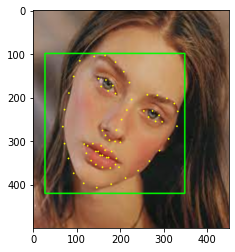

In [9]:
# landmark 영상 출력

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
        print(idx, point)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

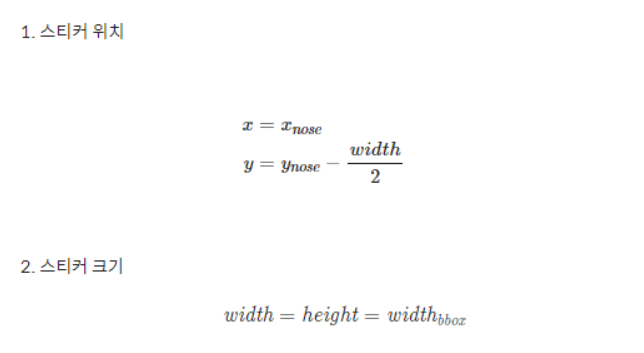

* 계산

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # print (landmark[30]) # nose center index : 30
    x = landmark[48][0]
    y = landmark[48][1]
    w = dlib_rect.width() // 2
    h = dlib_rect.height() // 2
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    print('landmarks :', list_landmarks[0][1])

(x,y) : (117,307)
(w,h) : (161,161)
landmarks : (93, 152)


# 이미지 회전

* [이미지 이동/확대/축소/회전 참고](https://bkshin.tistory.com/entry/OpenCV-13-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%9D%B4%EB%8F%99Translation-%ED%99%95%EB%8C%80%EC%B6%95%EC%86%8CScaling-%ED%9A%8C%EC%A0%84Rotation)

#### 이미지 회전
* 좌표를 선형변환하여 회전 한 뒤 평행 이동


* 회전을 위해 변환 행렬을 구함
 * getRotationMaxtrix2D(center, angle, scale) 사용
  * center : 회전축의 중심 좌표(x, y)
  * angle : 회전할 각도("-", 마이너스는 역회전, 60진법 기준)
  * scale : 확대 및 축소비율


* 변환 행렬(선형 변환한 것)을 warpAffine을 통해 적용, 이미지의 위치를 변경
 * warpAffine(src, M, dsize)
  * src : 내가 옮길 이미지
  * M : 변환 행렬
  * dsize : tuple, output image size
  * borderValue(255,255,255) : rgb 값 흰색
   * 흰색을 넣으면 아래 np.where 때문에 뒷 배경이 투명해짐 

280 280


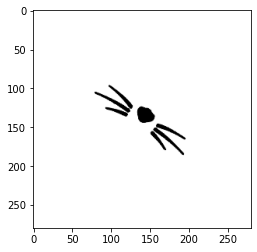

In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_ = cv2.imread(sticker_path, cv2.IMREAD_COLOR)
img_ = cv2.resize(img_, (280, 280))

rows,cols = img_.shape[0:2] # 중심 찾기
print(rows, cols)

m45 = cv2.getRotationMatrix2D((cols/2,rows/2), -35, 0.5)

img45 = cv2.warpAffine(img_, m45,(cols, rows), borderValue=(255,255,255))

img_sticker = img45

plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB))
plt.show()
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [12]:
# 원본 이미지에 스티커 이미지 추가를 위해 x,y 좌표 수정

refined_x = x - w // 2   # left
refined_y = y - h
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (37,146)


In [13]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_area.shape

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

# 시각화

In [14]:
# 수염 스티커 사이즈
img_sticker.shape

(280, 280, 3)

In [15]:
# 수염스티커 구역
sticker_area.shape

(280, 280, 3)

In [16]:
# 셀카 사진 
img_show.shape

(500, 450, 3)

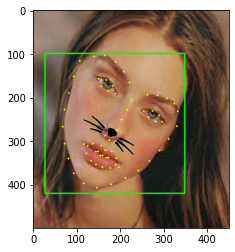

In [17]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

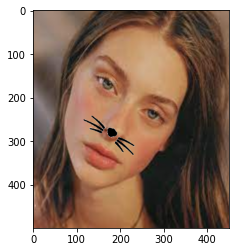

In [18]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 첫 시도 정리

* 고민을 통해 생각했던 부분 (__Q__)
 * left-top을 그대로 사용할 수는 없을까?
   * bottom 혹은 right는 어떻게 만들지?
 * 왜 이미지를 범위를 벗어나면 출력이 되지 않을까?
   * 이미지 범위가 벗어나도 벗어난 부분은 자르고 나오는 코드
   * sticker_area?
 * 수염은 왜 바탕이 투명해지지 않는가?
 * 왜 기존코드를 사용하면 수염이미지가 사이즈 더 이상 내려가지 않을까?
 * 수염을 돌리려면 어떻게 해야 하는가?

* 답변 (__A__)
 
 __1 기존의 left-top을 이용하기로 함.__
   * y값을 증가시켜도 더 이상 내려가지 못함.(이미지가 너무 커서)
   * 이미지 사이즈를 줄여보았다. 그러나 기존의 코드를 쓰면 이미지 사이즈가 최댓값으로 y도 그만큼 밖에 못내려간다.
   * 하지만 해결할 수 있는 문제점은 이미지가 코에서 입술 사이정도에 정확한 좌표를 찾아서 안착한다면 벗어날 일이 없기 때문에 아래에 y값이 음수가 나오고 그것을 0으로 만드는 부분은 없어져도 된다.
   * 그리고 음수가 나오는 이유는 사람 이미지의 사이즈의 범위에서 수염 이미지가 벗어나기 때문에 조금만 움직여도 문제가 되어 이미지 사이즈를 줄였던 것이다. 
   * 2 또는 3으로 나누었을 때 refined_x, refined_y는 양수가 나오게 된다.
 
 __2.왜 수염은 바탕이 투명해지지 않을까?__
   * 처음 시도에는 검은수염에 흰색바탕이였다.
   * refined_x, refined_y로 구한 위치가 이동을 하는 스티커의 left-top의 좌표였다.
   * 이것은 흰색 바탕이 아니였다면 몰랐을 것이다.(한참을 돌려보고 좌표를 찍어보고 알게 되었음)
   * 기존코드는 아래와 같았고 img_show[refined_y:img_sticker.shape[0],refined_x:refined_x+img_sticker.shape[1]]
   * 수정된 코드는 다음과 같다.
img_show[refined_y:refined_y+img_sticker.shape[0],refined_x:refined_x+img_sticker.shape[1]]
   * np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    * img_sticker가 만약 255이면 img_sticker의 픽셀에서 255인 값들을 sticker_area로 바꿔주고 아니면 img_sticker 바꾼다는 의미. 
    * 255가 아닌 픽셀 값들은 img_sticker의 값으로 브로드캐스팅됨
    
 __3.왜 기존코드를 사용하면 수염이미지가 사이즈 더 이상 내려가지 않을까?__
   * img_show[refined_y:img_sticker.shape[0],refined_x:refined_x+img_sticker.shape[1]]
   * img_show[refined_y:refined_y+img_sticker.shape[0],refined_x:refined_x+img_sticker.shape[1]]
   * refined_y:refined_y+img_sticker.shape[0]는 세로 값
   * refined_x:refined_x+img_sticker.shape[1]은 가로 값
   * 따라서 sticker_area는 sticker가 들어갈 구역을 말함
   * 기존코드에서 refined_y:img_sticker.shape[0]은 세로 값이 img_sticker[0]의 값만 있기 때문에 이동은 되었지만 일정 위치 이상으로 움직이지 못함 
   * 그에 비해 세로 값은 좌우가 자유롭게 이동된 것을 참고하여 비슷하게 바꿔보았음
 
 __3-1.수염이미지 관련 에러__
    * 기존코드 일 때 자주 발생되는 에러
     * 피연산자는 다음 모양과 함께 브로드 캐스트 할 수 없습니다.
     
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-14-0f4754ca1803> in <module>
      3 
      4 img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
----> 5 np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

<__array_function__ internals> in where(*args, **kwargs)

ValueError: operands could not be broadcast together with shapes (161,161,3) (0,161,3) (161,161,3) 
    
---------------------------------------------------------------------------

* 답변 (__A__) 이어서

 __3-2.수염이미지 관련 에러__
   * (161,161,3) (0,161,3) (161,161,3)이 다 맞아야 한다는 것
   * 즉  (161,161,3) (161,161,3) (161,161,3)이 되어야 한다는 것이다.
   * 여기서 브로드캐스팅이란 밑시딥 1.5.5에 잠깐 언급이 되었는데 설명이 빈약했었다
   * 이 부분을 풀잎시간에 토론을 하던 도중에 차원이 안맞으면 브로드캐스팅이 안되는게 있다고 들었었다.
   * 다음은 stackoverflow에서 브로드캐스팅에 관한 설명을 보았다.
   * https://stackoverflow.com/questions/60072251/operands-could-not-be-broadcast-together-with-shapes-1024-1280-4-3-1024-12)
   * 여기서 브로드캐스팅이란 밑시딥 1.5.5에 잠깐 언급이 되었는데 설명이 빈약했었다
   * 이 부분을 풀잎시간에 토론을 하던 도중에 차원이 안맞으면 브로드캐스팅이 안되는게 있다고 들었었다.
   * 다음은 stackoverflow에서 브로드캐스팅에 관한 설명을 보았다.
   * https://stackoverflow.com/questions/60072251/operands-could-not-be-broadcast-together-with-shapes-1024-1280-4-3-1024-12)
   * 브로드캐스팅 사양에 따라 작동합니다. 자세한 내용은 numpy 문서를 확인하지만 다음과 같이 작동합니다.
   
   1. 두 배열의 차원 수가 동일한지 확인합니다. 그렇지 않은 경우 왼쪽에서 1 로 확장합니다 (6->1,6).
   2. 1의 차원을 다른 배열의 차원으로 브로드캐스트합니다(1,3*2,1->2,3).
   3. 이 두 단계 후에도 모양이 여전히 다르면 예외를 발생시킵니다.
   
   
귀하의 경우 추가 차원이 오른쪽에 있으므로 규칙을 따르면 작동하지 않습니다. 추가 1차원을 직접 추가해야 합니다. 둘 다 numpy.reshape또는 numpy.expand_dims할 수 있습니다.
   

In [19]:
print(refined_x)
print(img_sticker.shape[0])
print('-'*30)
print(refined_y)
print(img_sticker.shape[1])

37
280
------------------------------
146
280


---

* refined_y:img_sticker.shape[0],
 * 199: 161

* refined_x:refined_x+img_sticker.shape[1]
 * 117: 117+ 161 = 278
 
 
*** img_show[199:161, 117:278]


 __* 이렇게 되는 경우 이미지가 잘린다.__

---

---

* refined_y:refined_y+img_sticker.shape[0], 

 * 199 : 199 + 161 = 360

* refined_x:refined_x+img_sticker.shape[1]
 * 117 : 117 + 161 = 278
 
 
*** img_show[199 : 360, 117 : 278]


__* 잘리지 않음__

---

# 두 번째 시도

* 답변 (__A__) 이어서 
 
 __4. 수염을 돌리려면 어떻게 하는가?__
  * 원본 스티커 이미지를 역방향으로 만들기
  * 이미지를 선형변환을 통해 이동/축소/확대/회전을 할 수 있음.
  * 선형변환을 위해 다음을 구함.
   * 중심값, 각도, 축소비율
   
 __4-1. 선형변환과 아핀변환__
  * 선형변환 후 아핀변환을 실시
  * __아핀변환__은 점, 직선, 평면을 보존하는 선형 매핑 방법
  * 변환 후에도 평행한 선들은 평행한 상태로 유지됨
  * 원하지 않는 카메라 각도에서 발생하는 기하학적 왜곡이나 형태 변형을 보정
  * 영상을 변환하고 결합하여 크고 평평한 좌표계로 옮겨서 왜곡을 제거

  * [아핀변환_MathWorks](https://kr.mathworks.com/discovery/affine-transformation.html)

# 세 번째 시도

* 셀카사진으로 수염스티커를 돌리지 않고 붙여봄
* 첫 번째 시도의 코드들을 하나로 모아서 시각화

rectangles[[(139, 139) (324, 325)]]
(x,y) : (237,324)
(w,h) : (186,187)
landmarks : (132, 212)
(187, 186, 3)
(x,y) : (144,137)


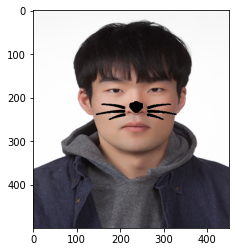

In [20]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/jeon_328.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (450, 500))
img_show = img_bgr.copy()
# plt.imshow(img_bgr)
# plt.show()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)
# plt.show()

detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    # print(list_landmarks[0])

# print(len(list_landmarks[0]))

# landmark 영상 출력

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
        # print(idx, point)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # print (landmark[30]) # nose center index : 30
    x = landmark[8][0]
    y = landmark[8][1]
    w = dlib_rect.width() // 1
    h = dlib_rect.height() // 1
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    print('landmarks :', list_landmarks[0][1])

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print (img_sticker.shape)

refined_x = x - w // 2   # left
refined_y = y - h
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_area.shape

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
# plt.show()

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 문제점 찾아보기

1. 셀프 카메라를 다양한 각도에서 촬영하여 스티커를 반복적 적용하기
* 정면, 고개를 옆으로 돌린 사진을 사용하였음

2. 문제점이 무엇인지 최대한 자세하게 기록
* 이미지 스티커의 크기를 변경하면 좌표값이 변경하기 때문에 단순히 이미지에 덧붙인다면 landmark의 좌표값을 다시 찾아야함.
* landmark에 좌표값이 없다면 원하는 위치의 좌표값을 구하기 위한 방법을 찾아야 하고 사진이 바뀔때마다 사진의 사이즈가 다르다면 좌표값을 찾기 위해 계산방법을 바꿔야 함
* 이미지 회전을 선형 변환을 통해 구했을 때 
 * 아핀변환을 통해서 이미지를 시각화하는 경우 jupter notebook에서 메모리 초과로 인해 커널이 중지되는 현상이 발생했었음. cv2.waitkey 및 distroyAllWindow를 plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB))로 대체 하였음

3. 스티커앱에서 생각해 볼 수 있는 문제점들


* 얼굴 각도에 따라 스티커가 어떻게 변해야하는가?
 * 지정한 스티커 사이즈를 유지한채 사이즈의 손실없이 회전 후 이동을 시켜야함. 
 

* 멀리서 촬영하면 왜 안될까? 누워서 촬영하면 왜 안될까? 
 * landmark가 제대로 잡히지 않음. 
 * 가급적이면 얼굴이 정면이어야 landmark가 잘 잡힘
 * 안경을 쓰면 landmark가 눈 근처를 제대로 인식하지 못함
 * 얼굴선을 따라 landmark를 그리기 때문에 멀리서 찍거나 누워서 찍으면 얼굴선이 제대로 인식하지 못하기 때문임.


* 실행 속도가 중요할까?
 * 사용자의 얼굴의 크기와 거리 형태에 따라 각도와 중심점 등의 세부 계산에 필요한 값들이 수시로 바뀌는데 사용자에게 제품을 서비스한다고 가정한다면 실행속도는 중요하다.


* 스티커앱을 만들 때 정확도는 얼마나 중요할까?
 * 만약 중심점을 찾는 정확도가 낮다면 다른 위치의 landmark를 인식할 수 있기 때문에 이상한 위치를 중심으로 잡아서 스티커 이미지가 제대로 씌워지지 않기 때문에 중요함.

# 느낀점

* opencv는 처음 해봤는데 아직도 좌표 값들의 움직임이 너무 헷갈리고 어렵다. 이미지를 이동/확대/축소/변환/회전을 시키려면 기본적으로 아핀변환과 행렬변환 및 계산의 이해가 많이 필요함을 깨달았다.